In [ ]:
#Word level one hotst encoding
import numpy as np
samples=["The cat sat on the mat.","The dog ate my homework."]
token_index={}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word]=len(token_index)+1
print(token_index)

max_length=10

results=np.zeros((len(samples),max_length,max(token_index.values())+1))
for i,sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:max_length]:
        index=token_index.get(word)
        results[i,j,index]=1

print(results.view())

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [ ]:
#character-level one hot encoding
import string
character=string.printable
token_index=dict(zip(character,range(1,len(character)+1)))
print(token_index)
max_length=50
results2=np.zeros((len(samples),max_length,max(token_index.values())+1))

for i,sample in enumerate(samples):
    for j,char in list(enumerate(sample))[:max_length]:
        index=token_index.get(char)
        results2[i,j,index]=1
print(results2.shape)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}
(2, 50, 101)


In [ ]:
#word-level one hot encoding using built-in function
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=1000)#1000 most common words
print(tokenizer)
tokenizer.fit_on_texts(samples)#build the word index
word_index=tokenizer.word_index
print(word_index)
sequences=tokenizer.texts_to_sequences(samples)
print(sequences)
one_hot_results=tokenizer.texts_to_matrix(samples,mode='binary')
print(one_hot_results.shape)


{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
(2, 1000)


In [ ]:
#one hot hashing trick
dimensionality=1000
max_length=10
results4=np.zeros((len(samples),max_length,dimensionality))
for i,sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:max_length]:
        #hases the word into a random index b/w 0 and 1000
        index=abs(hash(word))%dimensionality
        results4[i,j,index]=1
        
print(results4.shape)
print(results4)

(2, 10, 1000)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
#word embedding
#instaintiating the embedding layer
from keras.layers import Embedding
embedding_layer=Embedding(1000,64)
from keras.datasets import imdb
from tensorflow.keras import preprocessing
max_features=10000
maxlen=20

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=maxlen)

print("Initial training Shape: ",x_train.shape)
print("Initial test Shape: ",x_test.shape)
print(x_train[0])
#turns the list of integers into a 2D integer tensor of shape (samples,maxlen)
x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)
print("Final training shape:",x_train.shape)
print("Final test Shape: ",x_test.shape)
print("y Train: ",y_train.shape)
print(x_train[0])


Initial training Shape:  (25000,)
Initial test Shape:  (25000,)
[1, 14, 2, 16, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 17, 2, 2, 13, 2, 4, 2, 2, 16, 6, 2, 2, 19, 14, 2, 4, 2, 2, 2, 4, 2, 2, 2, 12, 16, 2, 2, 2, 2, 15, 13, 2, 4, 2, 17, 2, 17, 12, 16, 2, 18, 2, 5, 2, 2, 12, 8, 2, 8, 2, 5, 4, 2, 2, 16, 2, 2, 2, 2, 4, 2, 12, 16, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 12, 2, 2, 2, 2, 5, 14, 2, 16, 2, 2, 8, 4, 2, 2, 2, 15, 2, 4, 2, 7, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 4, 2, 2, 13, 2, 2, 4, 2, 15, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 18, 4, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 18, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 16, 2, 2, 2, 12, 16, 2, 5, 16, 2, 2, 2, 2, 15, 16, 2, 19, 2, 2]
Final training shape: (25000, 20)
Final test Shape:  (25000, 20)
y Train:  (25000,)
[ 2 16  2  2  2 12 16  2  5 16  2  2  2  2 15 16  2 19  2  2]


In [ ]:
#Using an Embedding layer and classifier on the IMDB data
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
# - 10000 → vocabulary size (max integer index + 1).
# - 8 → embedding dimension (each word index will be mapped to an 8‑dimensional vector).
# - input_length=maxlen → expected length of each input sequence
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
625/625 [==============================] - 25s 25ms/step - loss: 0.6920 - acc: 0.5192 - val_loss: 0.6912 - val_acc: 0.5246
Epoch 2/10
625/625 [==============================] - 15s 24ms/step - loss: 0.6867 - acc: 0.5566 - val_loss: 0.6846 - val_acc: 0.5646
Epoch 3/10
625/625 [=====================

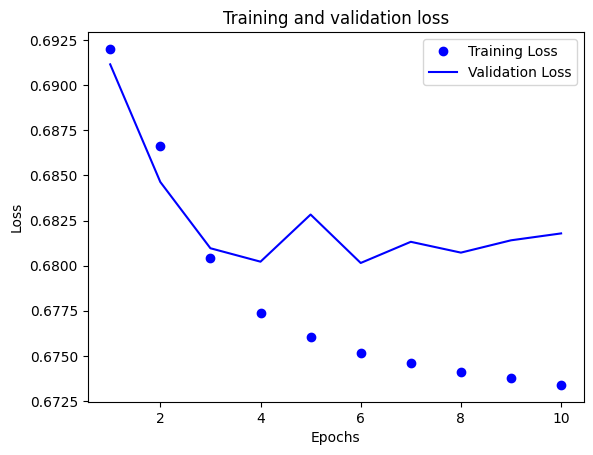

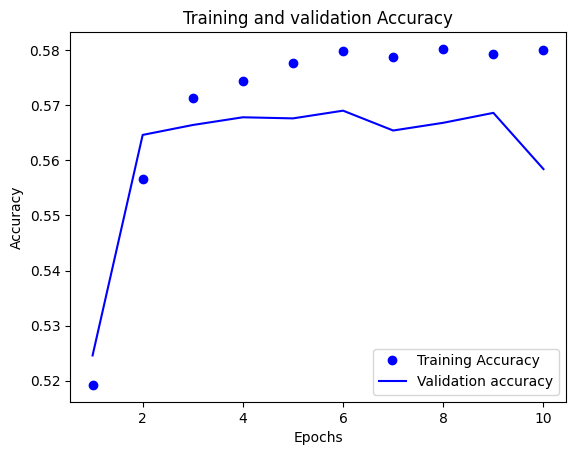

In [ ]:
#plotting
import matplotlib.pyplot as plt
loss_values=history.history['loss']
val_loss_values=history.history['val_loss']
epochs=range(1,len(loss_values)+1)
plt.title("Training and validation loss")
plt.plot(epochs,loss_values,'bo',label="Training Loss")
plt.plot(epochs,val_loss_values,'b',label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
plt.title("Training and validation Accuracy")
acc_values=history.history['acc']
val_acc_values=history.history['val_acc']
plt.plot(epochs,acc_values,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc_values,'b',label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1]:
#Tokenization from scratch
import os
train_dir=r"C:\Users\skuma\OneDrive\Desktop\ML\aclImdb\test"
labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name=os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if(fname[-4:]=='.txt'):
            with open(os.path.join(dir_name, fname), encoding="utf-8") as f:
                texts.append(f.read())
            if(label_type=='pos'):
                labels.append(1)
            else:
                labels.append(0)
                
print("Size of texts: ",len(texts))
print("Size of labels: ",len(labels))

Size of texts:  17243
Size of labels:  17243


In [27]:
#tokenizing the data
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen=100
training_samples=1000
valiadtion_samples=10000
max_words=10000
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)
print("Number of Sequences: ",len(sequences))
print("Length of each sequences:",len(sequences[1]))
word_index=tokenizer.word_index
print("Tokens: ",word_index)
print("Number of Unique tokens:",len(word_index))

data=pad_sequences(sequences,maxlen=maxlen)
labels=np.asarray(labels)

print('Shape of data tensor: ',data.shape)
print('Shape of label tensor: ',labels.shape)




Number of Sequences:  17243
Length of each sequences: 229
Tokens:  {'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5, 'br': 6, 'is': 7, 'in': 8, 'i': 9, 'it': 10, 'this': 11, 'that': 12, 'was': 13, 'movie': 14, 'for': 15, 'as': 16, 'with': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'have': 23, 'are': 24, 'be': 25, 'one': 26, 'his': 27, 'he': 28, 'at': 29, 'all': 30, 'they': 31, 'so': 32, 'by': 33, 'like': 34, 'an': 35, 'from': 36, 'who': 37, 'or': 38, 'just': 39, 'if': 40, 'out': 41, 'about': 42, "it's": 43, 'there': 44, 'her': 45, 'some': 46, 'has': 47, 'what': 48, 'good': 49, 'no': 50, 'when': 51, 'more': 52, 'even': 53, 'up': 54, 'would': 55, 'very': 56, 'only': 57, 'time': 58, 'my': 59, 'really': 60, 'she': 61, 'bad': 62, 'which': 63, 'had': 64, 'see': 65, 'me': 66, 'their': 67, 'can': 68, 'were': 69, 'story': 70, 'much': 71, 'than': 72, 'do': 73, 'well': 74, 'get': 75, 'been': 76, 'we': 77, "don't": 78, 'because': 79, 'other': 80, 'how': 81, 'into': 82, 'people': 83, '

In [39]:
#split the data into training and validation
indices=np.arange(data.shape[0])
print(indices)
np.random.shuffle(indices)
data=data[indices]
labels=labels[indices]

x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+valiadtion_samples]
y_val=labels[training_samples:training_samples+valiadtion_samples]
x_test=data[training_samples+valiadtion_samples:training_samples+valiadtion_samples+100]
y_test=labels[training_samples+valiadtion_samples:training_samples+valiadtion_samples+100]



[    0     1     2 ... 17240 17241 17242]


In [29]:
#parsing the GloVe word-embeddings file
glove_dir=r"C:\Users\skuma\OneDrive\Desktop\ML\glove.2024.wikigiga.100d\wiki_giga_2024_100_MFT20_vectors_seed_2024_alpha_0.75_eta_0.05.050_combined.txt"
embedding_index={}
with open(glove_dir, encoding="utf-8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        try:
            coefs=np.asarray(values[1:],dtype='float32')
        except ValueError:
            continue
        embedding_index[word]=coefs

print(f"Found {len(embedding_index)} word vectors.")

Found 1287623 word vectors.


In [30]:
#prepare the GloVe word-embeddings matrix
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i<max_words:
        embedding_vector=embedding_index.get(word)
        if(embedding_vector is not None):
            embedding_matrix[i]=embedding_vector[:100]       

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model=Sequential()
model.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                320032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
#Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable=False

In [33]:
#Training and Evaluation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_data=(x_val,y_val))
model.save_weights('pretrained_glove_model.h5')

Epoch 1/10
32/32 [==============================] - 2s 41ms/step - loss: 56.9726 - acc: 0.6700 - val_loss: 166.4827 - val_acc: 0.6473
Epoch 2/10
32/32 [==============================] - 1s 32ms/step - loss: 24.6803 - acc: 0.7850 - val_loss: 187.7732 - val_acc: 0.7169
Epoch 3/10
32/32 [==============================] - 1s 32ms/step - loss: 3.1096 - acc: 0.8460 - val_loss: 204.0397 - val_acc: 0.7147
Epoch 4/10
32/32 [==============================] - 1s 38ms/step - loss: 0.2522 - acc: 0.9080 - val_loss: 212.5688 - val_acc: 0.5486
Epoch 5/10
32/32 [==============================] - 1s 38ms/step - loss: 0.1910 - acc: 0.9480 - val_loss: 234.4228 - val_acc: 0.5918
Epoch 6/10
32/32 [==============================] - 1s 37ms/step - loss: 0.1155 - acc: 0.9720 - val_loss: 267.7527 - val_acc: 0.6324
Epoch 7/10
32/32 [==============================] - 1s 31ms/step - loss: 0.0789 - acc: 0.9900 - val_loss: 303.1998 - val_acc: 0.7107
Epoch 8/10
32/32 [==============================] - 1s 31ms/step - 

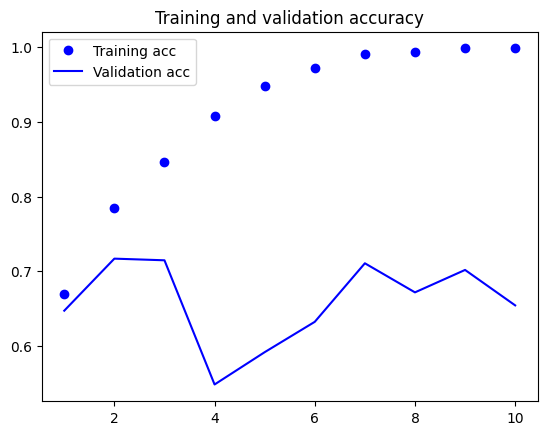

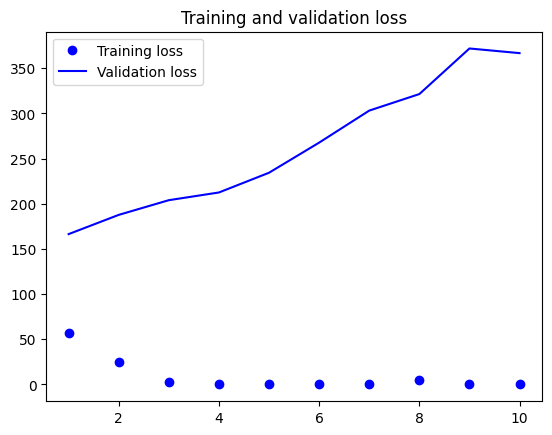

In [34]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()
model2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history2= model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                320032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
32/32 [==============================] - 2s 39ms/step - loss: 0.6291 - acc: 0.6980 - val_loss: 0.5861 - val_acc: 0.7321
Epoch 2/10
32/32 [===========================

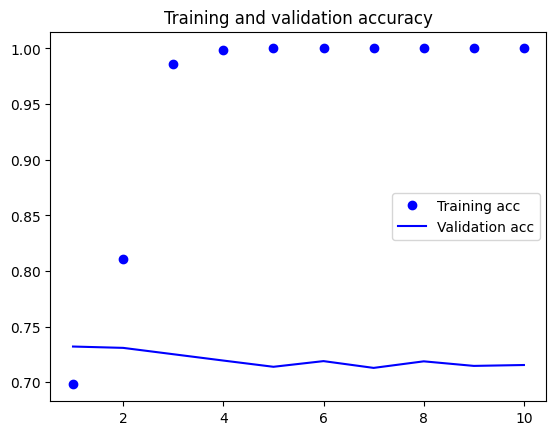

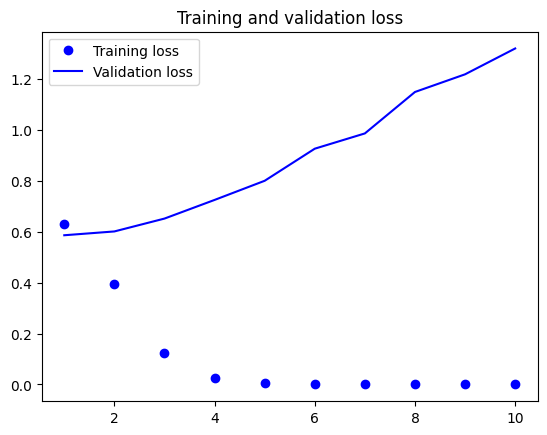

In [36]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
#evaluatin model
loss,acc=model.evaluate(x_test,y_test)
print("Test accuracy:",acc)

4/4 [==============================] - 0s 6ms/step - loss: 1371.0919 - acc: 0.5700
Test accuracy: 0.5699999928474426
